##복합 스왑의 예시
복합 스왑에서는 여러 스왑의 요소를 결합하여 복잡한 구조를 만들 수 있습니다. 여기서는 이자율 스왑과 주식 스왑을 결합하는 예제를 파이썬으로 구현해 보겠습니다.

###고정 금리와 주식 수익을 결합한 스왑
이 예에서는 한 당사자가 고정 금리를 지급하고 다른 당사자가 주식 수익을 지급받는 구조를 구현해보겠습니다.

In [2]:
import matplotlib.font_manager as fm

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


복합 스왑의 현재 가치: -81.24


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


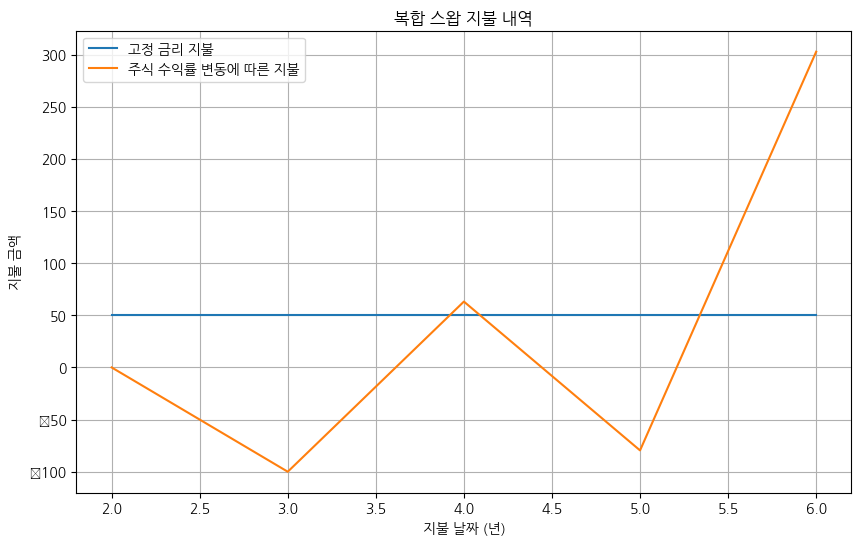

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 고정 금리 지불 계산 함수
def fixed_leg_payment(notional, fixed_rate, payment_dates, start_date):
    payments = notional * fixed_rate * np.diff(payment_dates, prepend=start_date)
    return payments

# 주식 수익률 변동에 따른 변동 금액 지불 계산 함수
def equity_leg_payment(notional, stock_prices, payment_dates, start_date):
    returns = np.diff(stock_prices, prepend=stock_prices[0]) / stock_prices[0]
    payments = notional * returns
    return payments

# 복합 스왑의 현재 가치 계산 함수
def combined_swap_value(notional, fixed_rate, stock_prices, start_date, payment_dates, discount_factors):
    # 고정 금리 지불 계산
    fixed_leg_payments = fixed_leg_payment(notional, fixed_rate, payment_dates, start_date)

    # 주식 수익률 변동에 따른 변동 금액 지불 계산
    equity_leg_payments = equity_leg_payment(notional, stock_prices, payment_dates, start_date)

    # 스왑의 현재 가치 계산
    swap_value = np.sum((equity_leg_payments - fixed_leg_payments) * discount_factors)

    return swap_value

# 실제 데이터 가져오기
# Apple Inc. 주가 데이터
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
S_values = apple_data['Close'].values

# 기본 변수 설정
notional = 1000  # 명목 금액
fixed_rate = 0.05  # 고정 금리 (5%)
start_date = 1  # 스왑 시작 시점 (1년 후)
payment_dates = np.array([2, 3, 4, 5, 6])  # 지불 날짜 (스왑 시작 후 매년)
discount_factors = np.exp(-0.05 * (payment_dates - start_date))  # 할인율

# 주가 데이터 (매년 말 주가로 가정)
annual_stock_prices = S_values[np.linspace(0, len(S_values)-1, len(payment_dates)).astype(int)]

# 복합 스왑의 현재 가치 계산
swap_value = combined_swap_value(notional, fixed_rate, annual_stock_prices, start_date, payment_dates, discount_factors)
print(f"복합 스왑의 현재 가치: {swap_value:.2f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(payment_dates, fixed_leg_payment(notional, fixed_rate, payment_dates, start_date), label='고정 금리 지불')
plt.plot(payment_dates, equity_leg_payment(notional, annual_stock_prices, payment_dates, start_date), label='주식 수익률 변동에 따른 지불')
plt.xlabel('지불 날짜 (년)')
plt.ylabel('지불 금액')
plt.title('복합 스왑 지불 내역')
plt.legend()
plt.grid(True)
plt.show()
